# Interaktive Darstellung der Kreuzkorrelation
Grafische Darstellung der Kreuzkorrelation anhand zweier einfacher Beispielfunktionen (Rechteck, Rampe). Definition:
$$f(t)\star g(t) = \int_{-\infty}^{\infty}f(t)\cdot g(t+\tau)dt$$
$g(t)$ wird wie - ähnlich wie bei der Faltung - über $f(t)$ geschoben, und über das Produkt beider Signale wird das Intergral berechnet. $g(t)$ wird aber nicht gespiegelt, und die Richtung der Verschiebung ist umgekehrt zu derjenigen bei der Faltung. Die Kreuzkorrelation ist nicht kommutativ.

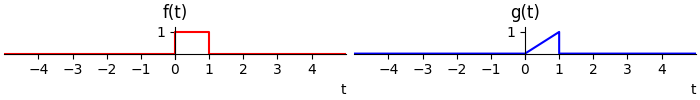

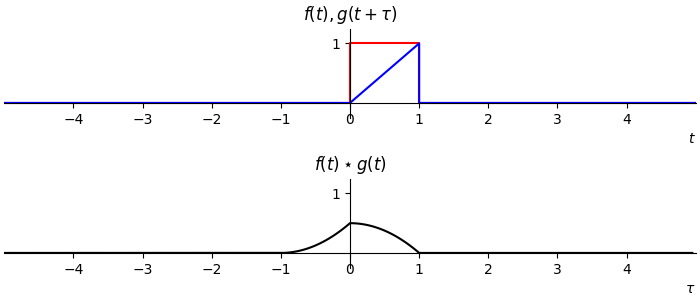

Output()

In [5]:
"""
(c) Benno Dömer | HS Pforzheim 2023 
Achtung: Hier wird keine Kreuzkorrelation berechnet, es werden lediglich die Signale entsprechend der Kreuzkorrelation gezeigt. 
Der Code ist nicht geeignet, um die Kreuzkorrelation zu verstehen, das Ergebnis schon.

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -q ipywidgets
    %pip install -q ipympl

# 'widget' für interaktive Plots
%matplotlib widget 
# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, sin, cos, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
import numpy as np
from matplotlib.pyplot import (figure, plot, stem, legend, text, xticks, yticks, 
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
import matplotlib.pyplot as plt
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

fig1 = figure(figsize=(7, 1), dpi=100, 
       layout='constrained',num=' ') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    xlim(-5,5)
    ylim(-.25, 1.25)
    xticks(np.arange(-4,5,1))
    yticks((1.0,))

# Rect- und Dreieckssignale
ts = np.array([-15, 0, 0, 1, 1, 15])
srect = np.array( [0, 0, 1, 1, 0, 0])
stri  = np.array( [0, 0, 0, 1, 0, 0])

# Kreuzkorrelationsergebnis
t=np.arange(-5,5,0.05)
res = t*0
res=0.5*(t**2+2*t+1) # für Bereich zwischen -1 und 0
res[t>0]= 0.5*(1-t[t>0]**2)
res[t>1]=0
res[t<-1]=0

#Plot Signal 1
xl='t'
pstyle = 'r'
ax1 = subplot(1,2,1) 
s1h,=plot(ts, srect, pstyle)
xlabel(xl,loc='right')
title('f(t)')           
myplotstyle(ax1)

#Plot Signal 2
pstyle = 'b'
ax1 = subplot(1,2,2) 
s2h, = plot(ts,stri,pstyle)
xlabel(xl,loc='right')
title('g(t)')           
myplotstyle(ax1)
plt.show()

#plot moving sigs and cross corr
fig2 = figure(figsize=(7, 3), dpi=100, 
       layout='constrained',num='Kreuzkorrelation') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

xl = '$t$'
yl = '$f(t), g(t+\u03C4)$' # \u03C4 unicode tau

ax1 = subplot(2,1,1) 
fh, = plot(ts,srect,'r')
gh, = plot(ts,stri,'b')
taut1=ax1.text(0,1,'',color='k',fontsize=8,ha='left') # Markierung für Tau
myplotstyle(ax1)
xlabel(xl,loc='right')
title(yl)

xl = '$\u03C4$'
yl = '$f(t)\star g(t)$'
ax1 = subplot(2,1,2) 
pl, = plot(t,res,'k')
taut2=ax1.text(0,1,'',color='k',fontsize=8,ha='left') # Markierung für Tau

myplotstyle(ax1)
xlabel(xl,loc='right')
title(yl)
plt.show()

def plotdata(t0,scen): # update data
    #scenario switcher
    s1 = srect
    s2 = stri
    if scen=='fg':
        ts1 = 0
        ts2 = 0
        sres = res
    elif scen=='gf':
        ts1 = 0
        ts2 = 0
        s1 = stri
        s2 = srect
        sres = np.flip(res)
    elif scen=='ftg':
        ts1 = 2
        ts2 = 0
        sres = np.roll(res,-int(ts1/0.05))
    elif scen=='fgt':
        ts1 = 0
        ts2 = 2
        sres = np.roll(res,int(ts2/0.05))
    elif scen=='ftgt':
        ts1 = 2
        ts2 = 2
        sres = res
    
    s1h.set_xdata(ts+ts1)
    s1h.set_ydata(s1)
    s2h.set_xdata(ts+ts2)
    s2h.set_ydata(s2)
    taut1.set_text(f'-\u03C4={-t0:.1f}')
    taut1.set_position((-t0,-.2))
    
    pl.set_xdata(t[t<t0])
    pl.set_ydata(sres[t<t0])
    taut2.set_text(f'\u03C4={t0:.1f}')
    taut2.set_position((t0,-.2))
    
    fh.set_xdata(ts+ts1) 
    fh.set_ydata(s1)
    gh.set_xdata(ts-t0+ts2)
    gh.set_ydata(s2)
    fig1.canvas.draw()
    fig2.canvas.draw()
    
# Interaktion: 
# Definition von Controls: 
tslider  = widgets.FloatSlider(min=-4, max=4, step=0.1, value=-4, continuous_update=True, description='$\u03C4$')
scencombo = widgets.Dropdown(options=[('Basis','fg'), 
                                      ('vertauscht', 'gf'),
                                      ('f(t) verschoben','ftg'),
                                      ('g(t) verschoben', 'fgt'),
                                      ('beide verschoben','ftgt')],value='fg',description='Scenario')

# Arrangieren hier in horizontaler Box:
ui1 = widgets.HBox([tslider, scencombo])
ui1.layout = widgets.Layout( border='solid 2px red')
#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'scen':scencombo, 't0': tslider }) 
#Anzeigen
display(ui1,out)

